In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer_data_processed.csv')
df.head()

,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,...,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,marital_status_married,marital_status_single,marital_status_widowed
0,1965.0,75579400.0,0.0,58.0,825500.0,114400.0,709800.0,223600.0,114400.0,114400.0,...,0.0,0.0,0.0,0.0,0.0,1.0,11.0,0.0,1.0,0.0
1,1962.0,60247200.0,2.0,38.0,14300.0,1300.0,7800.0,2600.0,1300.0,7800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0
2,1973.0,93096900.0,0.0,26.0,553800.0,63700.0,165100.0,144300.0,27300.0,54600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0
3,1992.0,34639800.0,1.0,26.0,14300.0,5200.0,26000.0,13000.0,3900.0,6500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0
4,1989.0,75780900.0,1.0,94.0,224900.0,55900.0,153400.0,59800.0,35100.0,19500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0


## Exploring Customer Age Distribution

In [6]:
# Create a new column called age
df['age'] = 2024 - df['birth_year']

Text(0.5, 1.0, 'Customer Age Distribution')

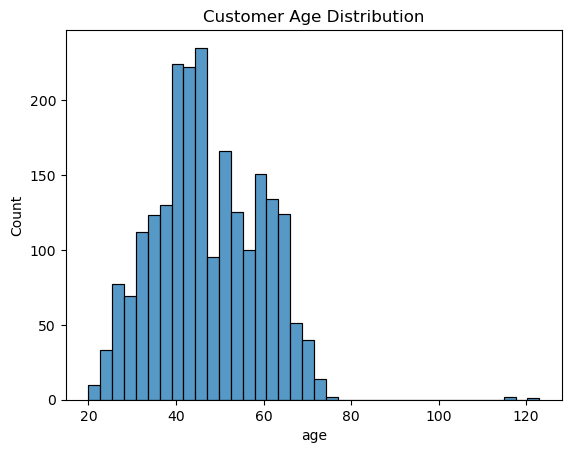

In [8]:
sns.histplot(df['age'])
plt.title('Customer Age Distribution')

The majority of customers are in their late 30s and 40s. However, I can also see that there are some customers who are around 120 years old.

In [9]:
# Validate cusomter age
df['age'].describe()

count    2240.000000
mean       47.194196
std        11.984069
min        20.000000
25%        39.000000
50%        46.000000
75%        57.000000
max       123.000000
Name: age, dtype: float64

The oldest customer is 123 years old, which is possible, but unlikely. For a more accurate analysis, I will include customers who are younger than 100 years old.

In [10]:
df = df[df['age'] <= 100]

Text(0.5, 1.0, 'Customer Age Distribution')

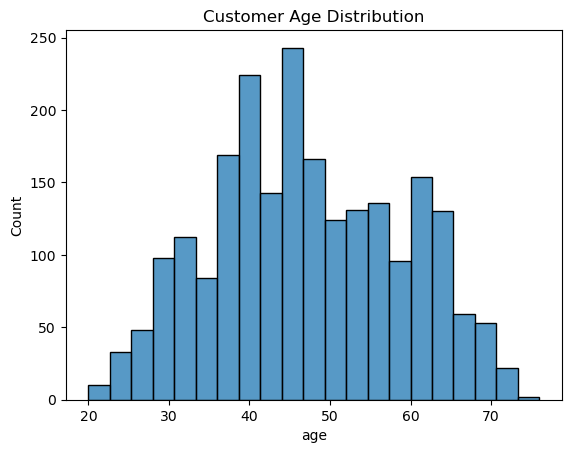

In [21]:
sns.histplot(df['age'])
plt.title('Customer Age Distribution')

For easier interpretation, let's create a new column called age_group to group customers by age.

In [24]:
age_bins = list(range(20, 81, 10))
age_labels = [f'{x}s' for x in age_bins[:-1]]
age_group = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df['age_group'] = age_group
df.head()

,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,...,promotion_3,promotion_4,promotion_5,promotion_6,revenue,marital_status_married,marital_status_single,marital_status_widowed,age,age_group
0,1965.0,75579400.0,0.0,58.0,825500.0,114400.0,709800.0,223600.0,114400.0,114400.0,...,0.0,0.0,0.0,1.0,11.0,0.0,1.0,0.0,59.0,50s
1,1962.0,60247200.0,2.0,38.0,14300.0,1300.0,7800.0,2600.0,1300.0,7800.0,...,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,62.0,60s
2,1973.0,93096900.0,0.0,26.0,553800.0,63700.0,165100.0,144300.0,27300.0,54600.0,...,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,51.0,50s
3,1992.0,34639800.0,1.0,26.0,14300.0,5200.0,26000.0,13000.0,3900.0,6500.0,...,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,32.0,30s
4,1989.0,75780900.0,1.0,94.0,224900.0,55900.0,153400.0,59800.0,35100.0,19500.0,...,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,35.0,30s


In [26]:
df['age_group'].value_counts()

40s    724
50s    487
30s    459
60s    380
20s    147
70s     40
Name: age_group, dtype: int64

Since there are only 40 customers in their 70s, it might beneifical for us to combine them to 60+ group.

In [27]:
df['age_group'] = df['age_group'].replace({'60s': '60+', '70s':'60+'})
df['age_group'].value_counts()

40s    724
50s    487
30s    459
60+    420
20s    147
Name: age_group, dtype: int64

<Axes: xlabel='age_group', ylabel='Count'>

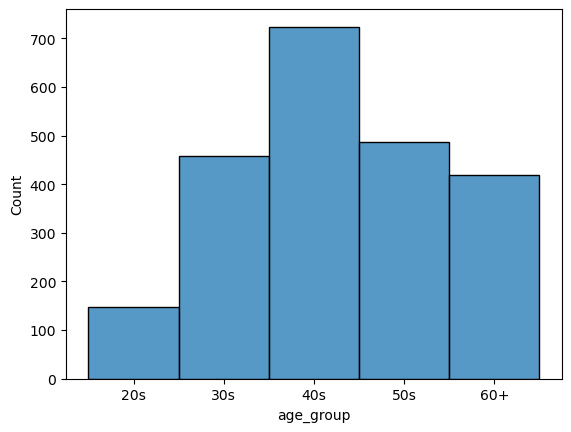

In [28]:
sns.histplot(df['age_group'])

## Exploring Customer Annual Income

Text(0.5, 1.0, 'Customer Annual Income Distribution')

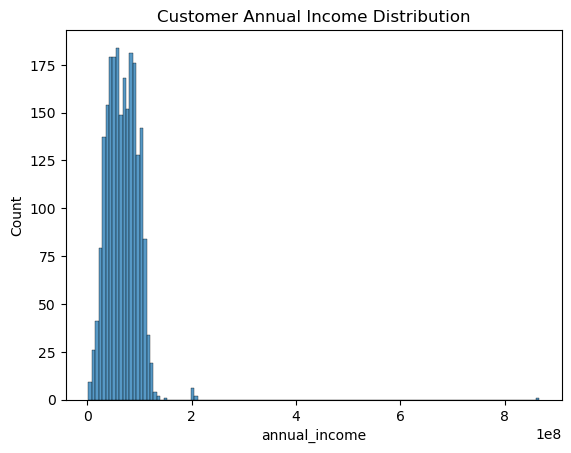

In [29]:
sns.histplot(df['annual_income'])
plt.title('Customer Annual Income Distribution')

Again, I observe some anomalies. Let's check for them using box plots and properly handle them.

<Axes: >

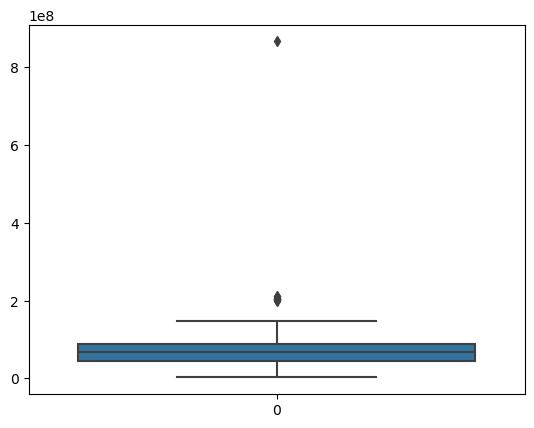

In [30]:
sns.boxplot(df['annual_income'])

In [31]:
# Removing anomalies that are out of IQR
income = df['annual_income']
q1 = income.quantile(0.25)
q3 = income.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filter_condition = (income >= lower_bound) & (income <= upper_bound)
df = df[filter_condition]

Text(0.5, 1.0, 'Customer Annual Income Distribution')

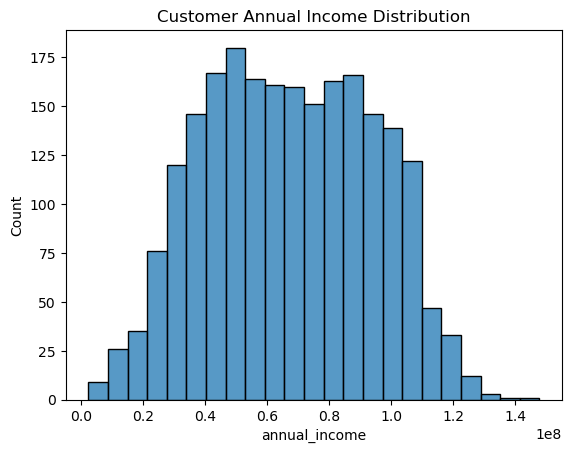

In [35]:
sns.histplot(df['annual_income'])
plt.title('Customer Annual Income Distribution')